<a href="https://colab.research.google.com/github/athresh/ml-for-engineers/blob/master/Evaluation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load data and print a statistical summary of the features**
<br>
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
<br>
The dataset consists of several medical predictor variables and one target variable, Outcome.

In [1006]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

url = 'https://raw.githubusercontent.com/athresh/ml-for-engineers/master/datasets/diabetes.csv'
data = pd.read_csv(url)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


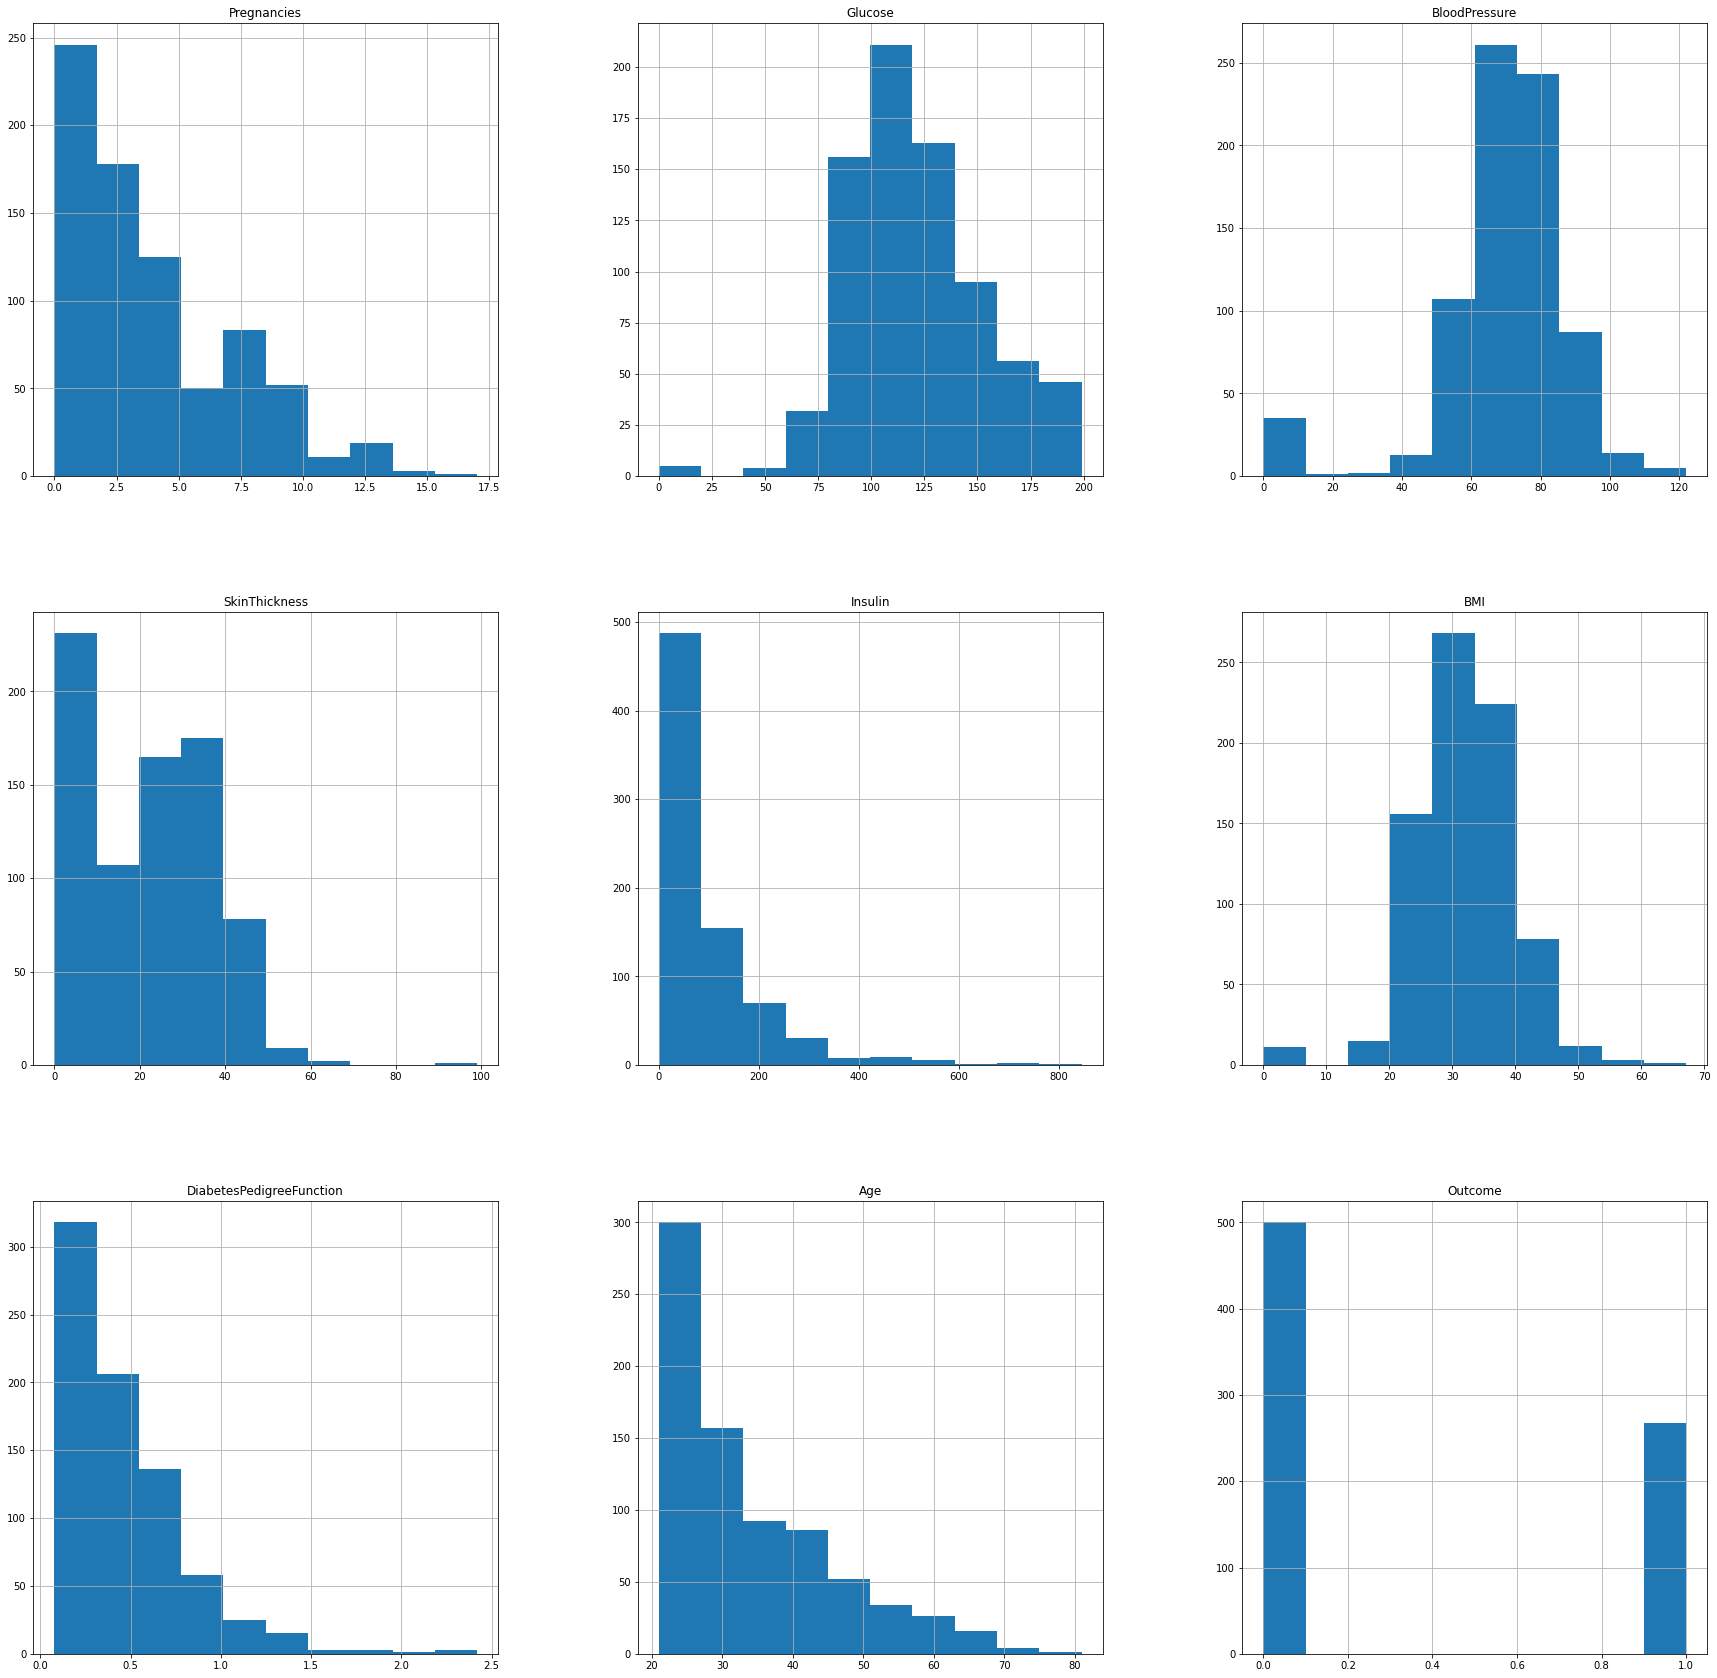

In [1007]:
hist = data.hist(figsize=(30,30))

**Data cleaning**
<br>
Features such as glucose and blood pressure can't take values as low as 0. We'll consider such anomolous values as missing and impute them in the next step.

In [1008]:
data_cleaned = data.copy(deep=True)
data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_cleaned[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
data_cleaned['Glucose'].fillna(data_cleaned['Glucose'].mean(), inplace=True)
data_cleaned['BloodPressure'].fillna(data_cleaned['BloodPressure'].mean(), inplace=True)
data_cleaned['SkinThickness'].fillna(data_cleaned['SkinThickness'].median(), inplace=True)
data_cleaned['Insulin'].fillna(data_cleaned['Insulin'].median(), inplace=True)
data_cleaned['BMI'].fillna(data_cleaned['BMI'].mean(), inplace=True)

data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


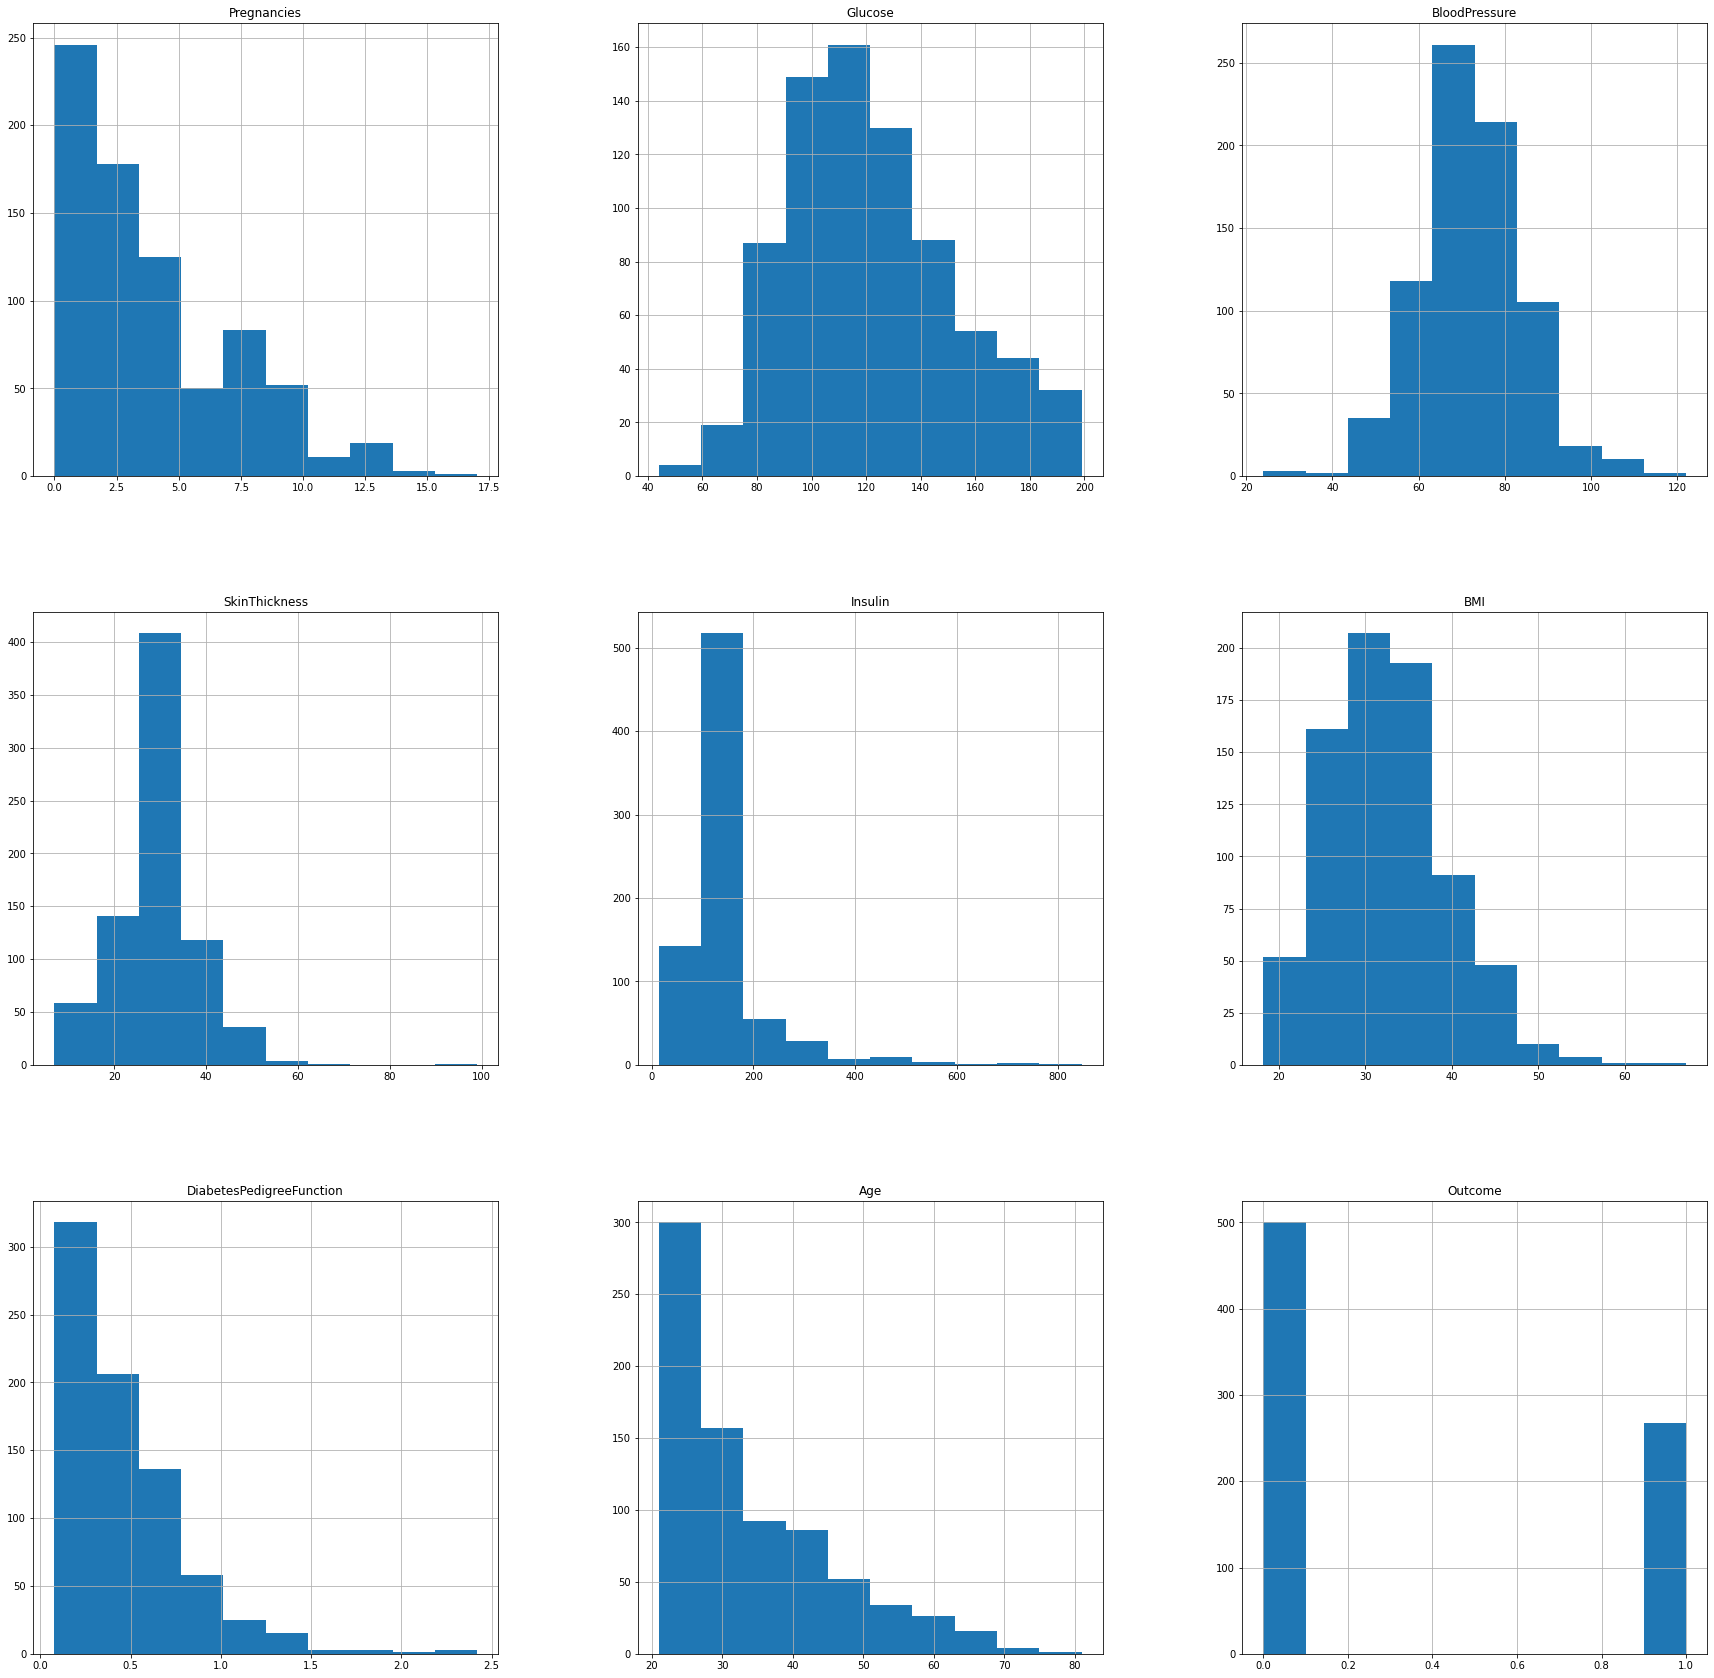

In [990]:
hist = data_cleaned.hist(figsize=(30,30))

**Model training**
<br>
Split the data into train and test sets in a 0.8:0.2 ratio. Here we use a decision tree to predict the outcome. For now we will use a max depth of 3.

In [991]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
cols_X = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
cols_y = ['Outcome']
X,y = data_cleaned[cols_X], data_cleaned[cols_y[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60, stratify=y)
model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(X_train, y_train);
print("Training complete")

Training complete


**Visualizing the decision tree**

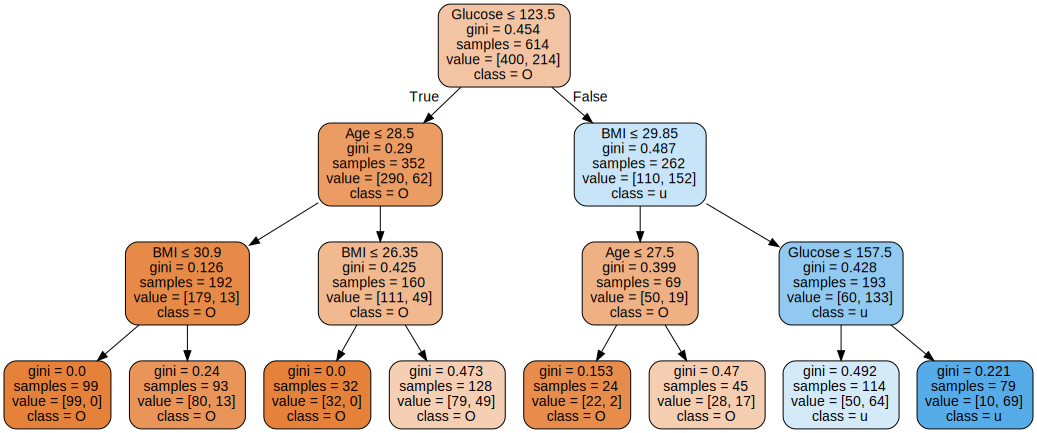

In [992]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=cols_X, class_names=cols_y[0], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Model predictions on the train and test set**

In [993]:
pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
y_pred_prob = model.predict_proba(X_test)[:,1]

**Implementation of performance metrics**
<br>
Implement and print out the following performance metrics: accuracy, true positive rate, false positive rate, precision, recall and F1 score. Calculate the performance metrics of the trained model on the test set and compare it with scikit's metrics.
Accuracy = 

In [994]:
implemented_metrics = {"accuracy":None, "precision":None, "recall":None, "f1":None}
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
report_test = metrics.classification_report(y_test, pred_test, output_dict=True)
scikit_metrics = {"accuracy":metrics.accuracy_score(y_test, pred_test), "precision":report_test['1']['precision'], "recall":report_test['1']['recall'], "f1":report_test['1']['f1-score']}
def check_equal(a, b, criterion):
  if a == b:
    return "{} implemented correctly!".format(criterion)
  else:
    return "{} implemented incorrectly.".format(criterion)


metric = "accuracy"
# implemented_metrics[metric] = 
print(check_equal(implemented_metrics[metric], scikit_metrics[metric], metric))

accuracy implemented incorrectly.


**Calculating precision**
<br>
For the next two metrics you'd first want to calculate true positives, true negatives, false positives and false negatives.
<br>
precision = TP/(TP+FP)

In [995]:
metric = "precision"
# implemented_metrics[metric] = 
print(check_equal(implemented_metrics[metric], scikit_metrics[metric], metric))

precision implemented incorrectly.


**Calculating recall**
<br>
recall = TP/(TP+FN)

In [996]:
metric = "recall"
print(check_equal(implemented_metrics[metric], scikit_metrics[metric], metric))

recall implemented incorrectly.


**Calculating f1 score**
<br>
<div class="math">
f1 = 2*(precision*recall)/(precision + recall)
</div>

In [997]:
metric = "f1"
# implemented_metrics[metric] = 
print(check_equal(implemented_metrics[metric], scikit_metrics[metric], metric))

f1 implemented incorrectly.


**Test accuracy using scikit's functions**

In [998]:
acc_test = metrics.accuracy_score(y_test, pred_test)
acc_train = metrics.accuracy_score(y_train,pred_train)
print("Accuracy on test set={}".format(acc_test))
print("Accuracy on train set={}".format(acc_train))

Accuracy on test set=0.7337662337662337
Accuracy on train set=0.7703583061889251


**Classification report for test and train sets**

In [999]:
report_test = metrics.classification_report(y_test, pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       100
           1       0.66      0.50      0.57        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.72       154



In [1000]:
report_train = metrics.classification_report(y_train, pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       400
           1       0.69      0.62      0.65       214

    accuracy                           0.77       614
   macro avg       0.75      0.74      0.74       614
weighted avg       0.77      0.77      0.77       614



**Visualization of confusion matrix**

Text(0.5, 15.0, 'Predicted value')

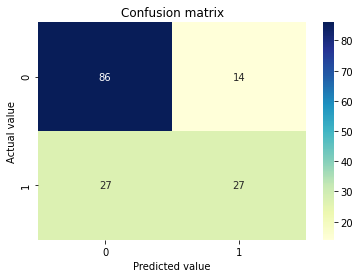

In [1001]:
import seaborn as sns
confusion_matrix_test = metrics.confusion_matrix(y_test, pred_test)
p = sns.heatmap(pd.DataFrame(confusion_matrix_test), annot=True, cmap="YlGnBu", fmt="g")
plt.title('Confusion matrix')
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

**Plotting AUROC**

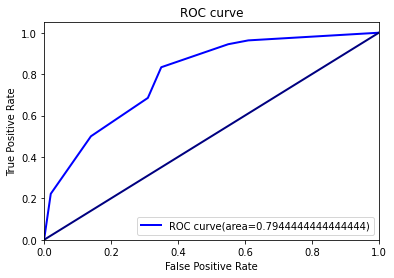

In [1002]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve(area={})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

**Hyperparameter optimization through validation set performance metrics**
<br>
Here we calculate the validation set accuracy of the model as we change the 'max_tree_depth' hyperparameter value. We choose the best 'max_tree_depth' through this and use it retrain the model and report the results on the test set.

In [1003]:
from sklearn.model_selection import StratifiedKFold
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=60)
kf = StratifiedKFold(n_splits=10)
X_train_copy = X_train.copy(deep=True)
y_train_copy = y_train.copy(deep=True)
acc_max = 0
for max_depth in range(1,20):
    acc=[]
    for train_index, val_index in kf.split(X_train_copy, y_train_copy):
        X_train_cv, X_val = X_train_copy.iloc[train_index], X_train_copy.iloc[val_index]
        y_train_cv, y_val = y_train_copy.iloc[train_index], y_train_copy.iloc[val_index]
        model = tree.DecisionTreeClassifier(max_depth=max_depth)
        model = model.fit(X_train_cv, y_train_cv)
        pred_val = model.predict(X_val)
        acc_cur = metrics.accuracy_score(y_val, pred_val)
        acc.append(acc_cur)
#     print(acc)
    print("Accuracy with max tree depth of {} = {}".format(max_depth, np.mean(acc)))
    if np.mean(acc) > acc_max:
        acc_max = np.mean(acc)
        max_depth_best = max_depth
print("Best max tree depth value based on cross validation = {}".format(max_depth_best))
model = tree.DecisionTreeClassifier(max_depth=max_depth_best)
model = model.fit(X_train, y_train)
pred_test = model.predict(X_test)
acc_test = metrics.accuracy_score(y_test, pred_test)
print("Accuracy on test set = {}".format(acc_test))

Accuracy with max tree depth of 1 = 0.7005288207297726
Accuracy with max tree depth of 2 = 0.7380750925436278
Accuracy with max tree depth of 3 = 0.7347964040190377
Accuracy with max tree depth of 4 = 0.7589899524061343
Accuracy with max tree depth of 5 = 0.736118455843469
Accuracy with max tree depth of 6 = 0.713379164463247
Accuracy with max tree depth of 7 = 0.7182178741406664
Accuracy with max tree depth of 8 = 0.7117662612374406
Accuracy with max tree depth of 9 = 0.7035959809624538
Accuracy with max tree depth of 10 = 0.6970914859862507
Accuracy with max tree depth of 11 = 0.6857747223691169
Accuracy with max tree depth of 12 = 0.6954785827604442
Accuracy with max tree depth of 13 = 0.6971708090957165
Accuracy with max tree depth of 14 = 0.6955050237969329
Accuracy with max tree depth of 15 = 0.7036224219989424
Accuracy with max tree depth of 16 = 0.6956636700158647
Accuracy with max tree depth of 17 = 0.7005288207297726
Accuracy with max tree depth of 18 = 0.6954521417239556
Acc

**Effect of changing

In [1004]:
pred_test = (model.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
report_test = metrics.classification_report(y_test, pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.60      0.78      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154



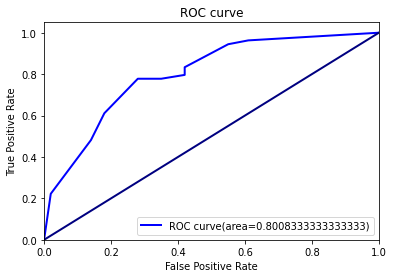

In [1005]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='blue', lw=lw, label='ROC curve(area={})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()